Train and fine-tune a Decision Tree for the moons dataset by following these steps.
1. use `make_moons(n_samples=10000, noise=0.4)` to generate a moons dataset
2. use `train_test_split()` to split the dataset into a training set and a test set
3. Use grid search with cross validation. With the help of `GridSearchCV`. And find good hyperparameter value for `DecisionTreeClassifier`. Try various values of `max_leaf_node`.
4. Trainee ton full training set using these hyperparameters. And measure your models performance on the test set. You should get roughly 85% to 87% accuracy.

In [15]:
%pip install scikit-learn pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=10000, noise=0.4)

In [17]:
X

array([[ 0.86080579, -0.33547197],
       [ 1.70045087, -0.32762063],
       [-0.15357764,  0.44860149],
       ...,
       [ 0.07396092, -0.57921702],
       [ 1.27801949, -0.4325822 ],
       [ 0.69375037,  1.19556234]])

In [18]:
y

array([0, 1, 1, ..., 1, 1, 0])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [21]:
param_grid= {
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
}

clf= DecisionTreeClassifier(random_state=42)
grid_search= GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_leaf_nodes': [None, 10, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [22]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Best parameters found:  {'max_leaf_nodes': 30}
Best cross-validation score:  0.856625


In [23]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

In [24]:
predictions

array([0, 1, 1, ..., 1, 0, 0])

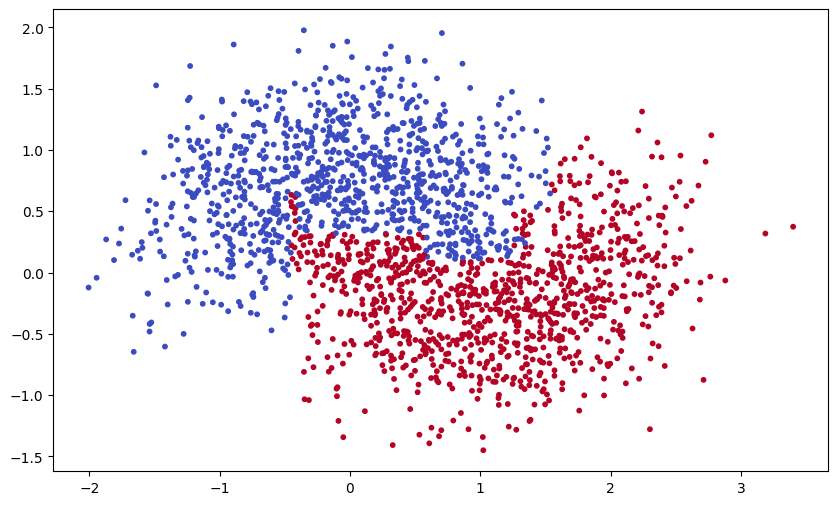

In [30]:
#Plot Graph
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='coolwarm', s=10)
plt.show()
